In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
# Load data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

#train_data
#test_data

In [376]:
def clean_data(train_data, test_data):
    text_cols_tr = train_data.select_dtypes(include=['object']).columns
    num_cols_tr = train_data.select_dtypes(include=['int64', 'float64']).columns
    text_cols_te = test_data.select_dtypes(include=['object']).columns
    num_cols_te = test_data.select_dtypes(include=['int64', 'float64']).columns
    
    # Replace ?
    train_data.replace('?', np.nan, inplace=True)
    test_data.replace('?', np.nan, inplace=True)

    # Impute missing values in numerical columns with mean
    train_data[num_cols_tr] = train_data[num_cols_tr].apply(pd.to_numeric, errors='coerce')
    test_data[num_cols_te] = test_data[num_cols_te].apply(pd.to_numeric, errors='coerce')
    train_data[num_cols_tr] = train_data[num_cols_tr].fillna(train_data[num_cols_tr].mean())
    test_data[num_cols_te] = test_data[num_cols_te].fillna(test_data[num_cols_te].mean())

    # Impute missing values in categorical columns with mode
    train_data[text_cols_tr] = train_data[text_cols_tr].apply(lambda x: x.fillna(x.mode()[0]))
    test_data[text_cols_te] = test_data[text_cols_te].apply(lambda x: x.fillna(x.mode()[0]))
    
    train_data['capital.gain'] = train_data['capital.gain'].replace(to_replace=r'\d+', value=0, regex=True)
    test_data['capital.gain'] = test_data['capital.gain'].replace(to_replace=r'\d+', value=0, regex=True)
    
    train_data['capital.loss'] = train_data['capital.loss'].replace(to_replace=r'\d+', value=0, regex=True)
    test_data['capital.loss'] = test_data['capital.loss'].replace(to_replace=r'\d+', value=0, regex=True)
    
    #drop cols
    train_data = train_data.drop(['education.num', 'fnlwgt'], axis=1)
    test_data = test_data.drop(['education.num', 'fnlwgt'], axis=1)
    
    #simplify race, education cols
    train_data['race'] = train_data['race'].replace(
        ['Black', 'Asian-Pac-Islander’, ‘Amer-Indian-Eskimo','Other'], 'Other')
    train_data['education'] = train_data['education'].replace(
        ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School')
    test_data['race'] = test_data['race'].replace(
        ['Black', 'Asian-Pac-Islander’, ‘Amer-Indian-Eskimo','Other'], 'Other')
    test_data['education'] = test_data['education'].replace(
        ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School')
    
    #convert to binary
    train_data['income'] = train_data['income'].map({'<=50K': 0, '>50K': 1})
    test_data['income'] = test_data['income'].map({'<=50K': 0, '>50K': 1})
    
    # Save cleaned data
    train_data.to_csv('cleaned_train_data.csv', index=False)
    test_data.to_csv('cleaned_test_data.csv', index=False)
    return train_data, test_data

In [377]:
cleaned_train_data, cleaned_test_data = clean_data(train_data, test_data)
#cleaned_train_data, cleaned_test_data

In [378]:
def plot_numeric_feature_correlation(train_data):
    #To do: plot the correlation matrix for numerical features
    numeric_features = cleaned_train_data.select_dtypes(include=['int64', 'float64'])
    
    corr_matrix = numeric_features.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='Reds')
    plt.title('Correlation between diff features')
    plt.show()

#plot_numeric_feature_correlation(train_data)

# from matplotlib import colormaps
# list(colormaps)

In [379]:
def plot_histogram(train_data):
    # To do: plot histograms for all features
    features_to_plot = cleaned_train_data.columns.difference(['income'])
    num_plots = len(features_to_plot)
    
    # Set up subplots
    fig, axs = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 4 * num_plots))

    for i, feature in enumerate(features_to_plot):
        sns.histplot(data=cleaned_train_data, x=feature, hue='income', ax=axs[i])
        axs[i].set_title(f'Column: {feature}')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('Count')
        
    for ax in axs:
        ax.tick_params(axis='x', rotation=50)


    plt.tight_layout()
    plt.show()

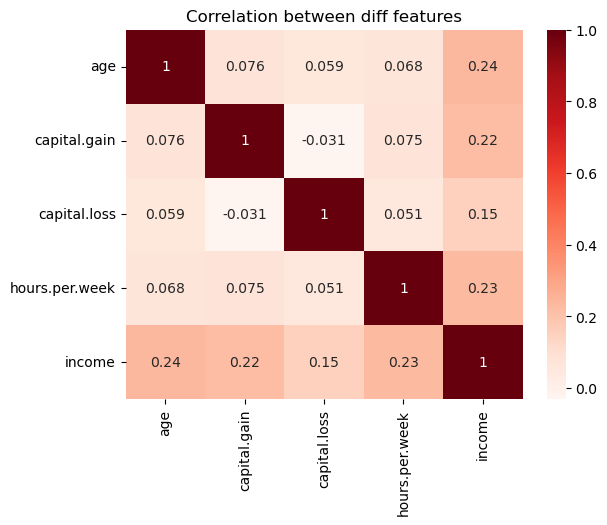

In [380]:
plot_numeric_feature_correlation(cleaned_train_data)

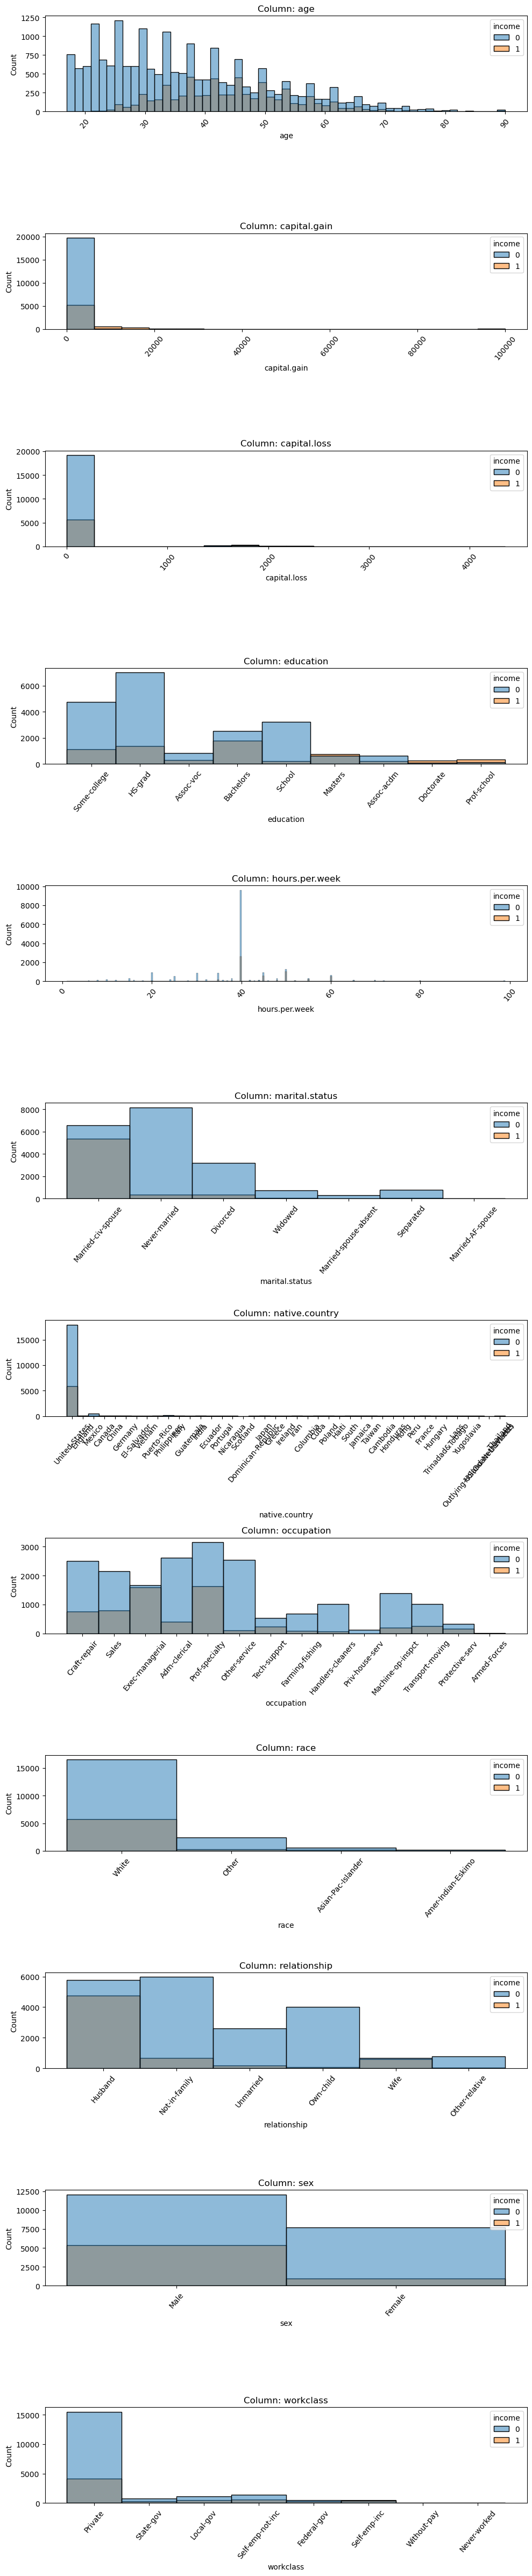

In [381]:
plot_histogram(cleaned_train_data)